# Requests

Before diving further into web-scraping and API calls, let's go over the basics of the `requests` module.

The `requests` module is a package that we can use to pull various web-files over the web. This includes `HTML`, `JSON`, and `XML` files. To get started, install the following module using the code-block below.

Also, check out the following documentation for additional guidance: https://requests.readthedocs.io/en/latest/user/quickstart/ 

In [1]:
!pip install requests

After installing, let's "request" a simple HTML using the `get` function and get some attributes from this site.

In [2]:
import requests

# NOTE: You can place any url you want in the `get()` function, although there will be no guarantee that you can get this data...
r = requests.get("https://www.scrapethissite.com/pages/simple/")

# let's print out the encoding of this page, as well as the "status" code of this page
print(r.encoding)
print(r.status_code)

utf-8
200


Notice that we can get some basic information on this website, but what if we want to get the actual **content** (that is the HTML) of this website. What do we use instead?

Quite simply, we can use the `text` attribute. Note that this will change depending on the resource that you want!

* text: for websites  
* json(): for API calls
* content: for binary content (images, BLOBs, etc)  

In [3]:
r.text

'<!doctype html>\n<html lang="en">\n  <head>\n    <meta charset="utf-8">\n    <title>Countries of the World: A Simple Example | Scrape This Site | A public sandbox for learning web scraping</title>\n    <link rel="icon" type="image/png" href="/static/images/scraper-icon.png" />\n\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <meta name="description" content="A single page that lists information about all the countries in the world. Good for those just get started with web scraping.">\n\n    <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" rel="stylesheet" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" crossorigin="anonymous">\n    <link href=\'https://fonts.googleapis.com/css?family=Lato:400,700\' rel=\'stylesheet\' type=\'text/css\'>\n    <link rel="stylesheet" type="text/css" href="/static/css/styles.css"

Much like `f.read()` from yesterday, this gives us the actual data inside of the site!

## JSON

Now that we have a handle on how to extract data from the web, let's utilize this to pull information from a Web API & interact with JSON files.

This file is used to transmit (free or paid) resources to a specific endpoint. While Web APIs are often used in the world of web-development, it's also applicable to our roles as data scientists/analysts/engineers.

In [4]:
r = requests.get("https://pokeapi.co/api/v2/pokemon/pikachu")

data = r.text

print(data[0])

{


Note that we should not treat data extracted from URL just as string, instead...

In [8]:
r = requests.get("https://pokeapi.co/api/v2/pokemon/pikachu")

data = r.json()

print(data)

{'abilities': [{'ability': {'name': 'static', 'url': 'https://pokeapi.co/api/v2/ability/9/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'lightning-rod', 'url': 'https://pokeapi.co/api/v2/ability/31/'}, 'is_hidden': True, 'slot': 3}], 'base_experience': 112, 'cries': {'latest': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/latest/25.ogg', 'legacy': 'https://raw.githubusercontent.com/PokeAPI/cries/main/cries/pokemon/legacy/25.ogg'}, 'forms': [{'name': 'pikachu', 'url': 'https://pokeapi.co/api/v2/pokemon-form/25/'}], 'game_indices': [{'game_index': 84, 'version': {'name': 'red', 'url': 'https://pokeapi.co/api/v2/version/1/'}}, {'game_index': 84, 'version': {'name': 'blue', 'url': 'https://pokeapi.co/api/v2/version/2/'}}, {'game_index': 84, 'version': {'name': 'yellow', 'url': 'https://pokeapi.co/api/v2/version/3/'}}, {'game_index': 25, 'version': {'name': 'gold', 'url': 'https://pokeapi.co/api/v2/version/4/'}}, {'game_index': 25, 'version': {'name': 'silve

In [9]:
r = requests.get("https://pokeapi.co/api/v2/pokemon/pikachu")

data = r.json()

print(data["abilities"])

[{'ability': {'name': 'static', 'url': 'https://pokeapi.co/api/v2/ability/9/'}, 'is_hidden': False, 'slot': 1}, {'ability': {'name': 'lightning-rod', 'url': 'https://pokeapi.co/api/v2/ability/31/'}, 'is_hidden': True, 'slot': 3}]


This should be loaded using the `json()` method. Afterwards, we can apply basic programming structures to gain access to data.

In [6]:
r = requests.get("https://pokeapi.co/api/v2/pokemon/pikachu")

data = r.json()

for ab in data["abilities"]:
    print(ab)

{'ability': {'name': 'static', 'url': 'https://pokeapi.co/api/v2/ability/9/'}, 'is_hidden': False, 'slot': 1}
{'ability': {'name': 'lightning-rod', 'url': 'https://pokeapi.co/api/v2/ability/31/'}, 'is_hidden': True, 'slot': 3}


# Stock API Exercise 

Follow along with the listed directions below to implement some basic data engineering via the `requests`,`json`, and `pandas` packages.

By the end of this analysis, we should be able to convert a JSON object into a pandas DataFrame.

We will then use these dataframes for some basic analysis.

In [16]:
import requests

# PART 1

# TODO: paste in your key here
key = "EkTA8RNOQOjFU60VuGSxnQDwp1Proesi"

# TODO: Using the "aggregates" endpoint, make a URL that will request stock data from BA (Boeing) from the date
# ranges of 2024-01-01 to 2024-03-11
# Notice that most of the URL is filled in for you. You just need to fill int the `BA` stock ticker after `ticker`
# As well as `2024-01-01` after `day`, and then `2024-03-11` 
# URL: https://polygon.io/docs/stocks/get_v2_aggs_ticker__stocksticker__range__multiplier___timespan___from___to 

url = f"https://api.polygon.io/v2/aggs/ticker/BA/range/1/day/2024-01-01/2024-03-11?adjusted=true&sort=asc&limit=120&apiKey={key}"

r = requests.get(url)

# TODO: print out the request status of this GET request
r.status_code

200

In [17]:
#just trying get request out
# url = "https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/day/2020-01-09/2023-01-09?adjusted=true&sort=asc&limit=120&apiKey=EkTA8RNOQOjFU60VuGSxnQDwp1Proesi"

# r = requests.get(url)

# r.json()

In [26]:
# PART 2

# TODO: Load this data as a JSON object 
data = r.json()

# TODO: and then print out the 'results' value of this `data` JSON object. 
# What do you notice is the structure of this JSON object?
# Is it just one single object, or multiple?

data["results"]

[{'v': 5815219.0,
  'vw': 253.5573,
  'o': 257.28,
  'c': 251.76,
  'h': 258.59,
  'l': 250.87,
  't': 1704171600000,
  'n': 105365},
 {'v': 7219930.0,
  'vw': 245.989,
  'o': 248.32,
  'c': 243.91,
  'h': 250.13,
  'l': 243,
  't': 1704258000000,
  'n': 107188},
 {'v': 5170739.0,
  'vw': 246.1371,
  'o': 244.58,
  'c': 244.94,
  'h': 248.28,
  'l': 244.18,
  't': 1704344400000,
  'n': 72768},
 {'v': 3849746.0,
  'vw': 248.2812,
  'o': 245.04,
  'c': 249,
  'h': 250.19,
  'l': 245.04,
  't': 1704430800000,
  'n': 63969},
 {'v': 40730433.0,
  'vw': 229.9861,
  'o': 228,
  'c': 229,
  'h': 233.85,
  'l': 225.79,
  't': 1704690000000,
  'n': 508678},
 {'v': 20687539.0,
  'vw': 226.1244,
  'o': 225.66,
  'c': 225.76,
  'h': 228.7899,
  'l': 223.2,
  't': 1704776400000,
  'n': 264877},
 {'v': 12883738.0,
  'vw': 228.8344,
  'o': 226.9,
  'c': 227.84,
  'h': 231.6099,
  'l': 226.64,
  't': 1704862800000,
  'n': 173746},
 {'v': 11830489.0,
  'vw': 224.3753,
  'o': 228.07,
  'c': 222.66,
  'h'

In [34]:
# PART 3

# TODO: Using a for-loop, loop through each day of day and print out the closing price as well as the opening price of
# each respective day
# NOTE: The "o" key represents "opening price", whereas the "c" key represents "closing price"

for day in data["results"]:
    print (day['o'],day['c'])

257.28 251.76
248.32 243.91
244.58 244.94
245.04 249
228 229
225.66 225.76
226.9 227.84
228.07 222.66
219.97 217.7
210.07 200.52
202.63 203.06
205.64 211.61
210.89 215.02
213.07 214.93
215.35 211.5
209.83 214.13
208.2 201.88
203.08 205.47
206.06 205.19
203.65 200.44
204.92 211.04
213.84 209.81
209.06 209.38
204.64 206.63
206.02 208.58
208.76 211.92
212.4 209.22
209.77 209.2
208.7 209.33
206.9 204.46
205.95 203.38
204.12 205.33
204.88 203.89
203.55 203.37
202.9 201.57
202 201.5
200.99 200.83
201.01 200.54
200.93 201.4
201.14 207
206.44 203.72
204 200
199.5 200.54
199.49 201.14
201.77 201
200.7 203.03
201.84 198.49
194.21 192.49


In [37]:
# PART 4
open_price = []
close_price = []

# TODO: now that we know how to access this data programmatically, let's loop through our results and save
# opening prices and closing prices into the two respective lists
for day in data["results"]:
    open_price.append(day['o'])
    close_price.append(day["c"])

# print out these lists to confirm that you've successfully saved data
print("open price:", open_price)
print("close price:", close_price)

open price: [257.28, 248.32, 244.58, 245.04, 228, 225.66, 226.9, 228.07, 219.97, 210.07, 202.63, 205.64, 210.89, 213.07, 215.35, 209.83, 208.2, 203.08, 206.06, 203.65, 204.92, 213.84, 209.06, 204.64, 206.02, 208.76, 212.4, 209.77, 208.7, 206.9, 205.95, 204.12, 204.88, 203.55, 202.9, 202, 200.99, 201.01, 200.93, 201.14, 206.44, 204, 199.5, 199.49, 201.77, 200.7, 201.84, 194.21]
close price: [251.76, 243.91, 244.94, 249, 229, 225.76, 227.84, 222.66, 217.7, 200.52, 203.06, 211.61, 215.02, 214.93, 211.5, 214.13, 201.88, 205.47, 205.19, 200.44, 211.04, 209.81, 209.38, 206.63, 208.58, 211.92, 209.22, 209.2, 209.33, 204.46, 203.38, 205.33, 203.89, 203.37, 201.57, 201.5, 200.83, 200.54, 201.4, 207, 203.72, 200, 200.54, 201.14, 201, 203.03, 198.49, 192.49]


In [38]:
# PART 5

import pandas as pd

# Next, let's create a DataFrame using this these two lists
data = {
    "open": open_price,
    "close": close_price
}

df = pd.DataFrame(data)

In [39]:
df.head()

,open,close
0,257.28,251.76
1,248.32,243.91
2,244.58,244.94
3,245.04,249.00
4,228.00,229.00


Complete the listed analysis below using this dataframe

In [41]:
# TODO: Calculate summary statistics on opening price and closing price for Boeing stock  
df.describe()

,open,close
count,48.000000,48.000000
mean,211.098333,210.731458
std,13.814562,13.559451
min,194.210000,192.490000
25%,202.832500,201.552500
50%,206.040000,206.050000
75%,212.567500,212.472500
max,257.280000,251.760000


<Axes: >

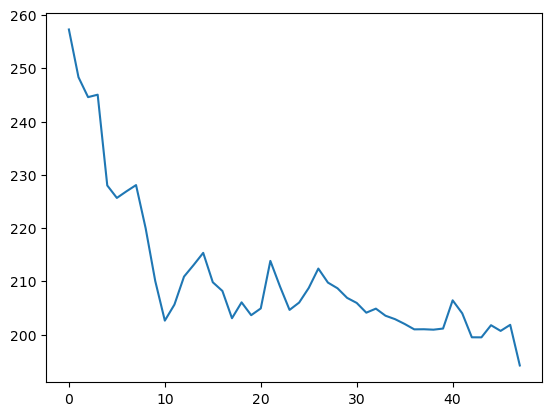

In [45]:
# TODO: plot a line plot on all available Boeing stock price
df["open"].plot()
#this is a time series dataset, look for trend and seasonality (dont see seasonality rn)

In [47]:
# TODO: Create a new column that is a calculation of the ratio of opening to closing stock price
df["ratio"] = df["open"] % df["close"]

df

,open,close,ratio
0,257.28,251.76,5.52
1,248.32,243.91,4.41
2,244.58,244.94,244.58
3,245.04,249.00,245.04
4,228.00,229.00,228.00
5,225.66,225.76,225.66
6,226.90,227.84,226.90
7,228.07,222.66,5.41
8,219.97,217.70,2.27
9,210.07,200.52,9.55
